In [1]:
#Ref: http://localhost:8888/notebooks/Untitled1.ipynb?kernel_name=conda-root-py#

In [2]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from patsy import dmatrices
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn.cross_validation import cross_val_score

In [3]:
dta = pd.read_csv("C:/Users/Valued Customer/Desktop/Python/LogisticRegression/CLSLOWBWT.CSV")

In [4]:
dta

,ID,BIRTH,SMOKE,RACE,AGE,LWT,BWT,LOW
0,1,1,1,3,28,120,2865,0
1,1,2,1,3,33,141,2609,0
2,2,1,0,1,29,130,2613,0
3,2,2,0,1,34,151,3125,0
4,2,3,0,1,37,144,2481,1
5,3,1,1,2,31,187,1841,1
6,3,2,1,2,35,209,1598,1
7,3,3,1,2,41,217,2015,1
8,4,1,0,3,25,105,3489,0
9,4,2,0,3,30,129,3554,0


In [5]:
dta.groupby('LOW').mean()

,ID,BIRTH,SMOKE,RACE,AGE,LWT,BWT
LOW,,,,,,,
0,92.875371,1.836795,0.338279,1.976261,26.163205,144.741840,3204.059347
1,95.092715,1.953642,0.536424,1.576159,27.059603,138.304636,2033.867550


In [85]:
dta.groupby('BIRTH').mean()

,ID,SMOKE,RACE,AGE,LWT,BWT,LOW
BIRTH,,,,,,,
1,94.500000,0.393617,1.851064,22.819149,129.851064,2848.159574,0.281915
2,94.500000,0.393617,1.851064,26.930851,150.638298,2857.367021,0.303191
3,89.091837,0.408163,1.857143,31.153061,150.520408,2838.153061,0.367347
4,99.642857,0.500000,1.857143,35.500000,155.642857,2578.857143,0.357143


In [86]:
# show plots in the notebook
%matplotlib inline

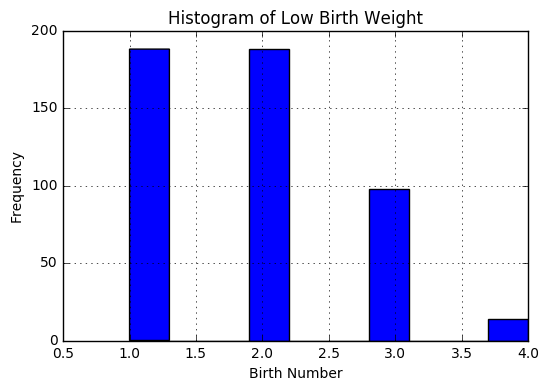

In [87]:
# histogram of birth number
dta.BIRTH.hist()
plt.title('Histogram of Low Birth Weight')
plt.xlabel('Birth Number')
plt.ylabel('Frequency')

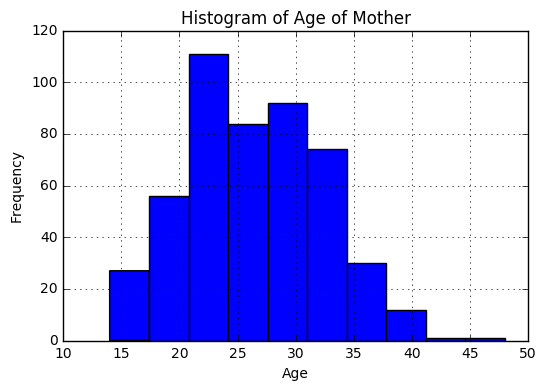

In [88]:
# histogram of age of mother
dta.AGE.hist()
plt.title('Histogram of Age of Mother')
plt.xlabel('Age')
plt.ylabel('Frequency')

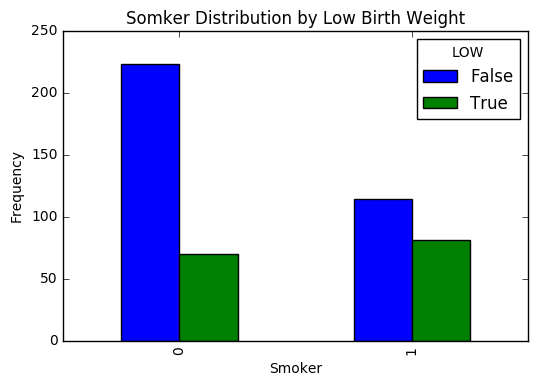

In [89]:
# barplot of low birth weights grouped by smoker status (True or False)
pd.crosstab(dta.SMOKE, dta.LOW.astype(bool)).plot(kind='bar')
plt.title('Somker Distribution by Low Birth Weight')
plt.xlabel('Smoker')
plt.ylabel('Frequency')

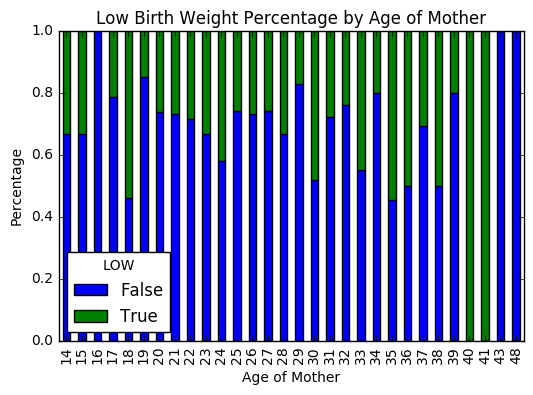

In [90]:
low_age = pd.crosstab(dta.AGE, dta.LOW.astype(bool))
low_age.div(low_age.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Low Birth Weight Percentage by Age of Mother')
plt.xlabel('Age of Mother')
plt.ylabel('Percentage')

In [91]:
# create dataframes with an intercept column and dummy variables for
y, X = dmatrices('LOW ~ ID + BIRTH + SMOKE + RACE + AGE + LWT',
                  dta, return_type="dataframe")
print (X.columns)

Index(['Intercept', 'ID', 'BIRTH', 'SMOKE', 'RACE', 'AGE', 'LWT'], dtype='object')


In [92]:
# flatten y into a 1-D array
y = np.ravel(y)

In [93]:
# instantiate a logistic regression model, and fit with X and y
model = LogisticRegression()
model = model.fit(X, y)

# check the accuracy on the training set
model.score(X, y)

0.70696721311475408

In [94]:
# what percentage had low birth weights?
y.mean()

0.3094262295081967

In [95]:
# examine the coefficients
pd.DataFrame(zip(X.columns, np.transpose(model.coef_)))

TypeError: data argument can't be an iterator

In [96]:
df1 = pd.DataFrame(dta, columns=['ID','AGE'])
df2 = pd.DataFrame(dta, columns=['ID', 'BIRTH', 'SMOKE', 'RACE', 'LWT', 'LOW'])
bins = [15, 25, 35, 45, 55]
group_names = ['15-24', '25-34', '35-44', '45-55']
age_groups = pd.cut(df1['AGE'], bins, labels=group_names)
df1['age_groups'] = pd.cut(df1['AGE'], bins, labels=group_names)
categories
df1.head(5)

NameError: name 'categories' is not defined

In [97]:
left = df2
right = df1
result = pd.merge(left, right, on='ID')
result.head(5)

,ID,BIRTH,SMOKE,RACE,LWT,LOW,AGE,age_groups
0,1,1,1,3,120,0,28,25-34
1,1,1,1,3,120,0,33,25-34
2,1,2,1,3,141,0,28,25-34
3,1,2,1,3,141,0,33,25-34
4,2,1,0,1,130,0,29,25-34


In [98]:
y, Z = dmatrices('LOW ~ BIRTH + SMOKE + RACE + age_groups + LWT', result, return_type="dataframe")
print (Z.columns)

Index(['Intercept', 'age_groups[T.25-34]', 'age_groups[T.35-44]',
       'age_groups[T.45-55]', 'BIRTH', 'SMOKE', 'RACE', 'LWT'],
      dtype='object')


In [99]:
Index([u'Intercept', u'age_groups[T.25-34]', u'age_groups[T.35-44]', u'age_groups[T.45-55]', u'BIRTH', u'SMOKE', u'RACE', u'LWT'],dtype='object')

NameError: name 'Index' is not defined

In [100]:
# flatten y into a 1-D array
y = np.ravel(y)

In [101]:
y

array([ 0.,  0.,  0., ...,  1.,  1.,  1.])

In [102]:
Z.head(5)

,Intercept,age_groups[T.25-34],age_groups[T.35-44],age_groups[T.45-55],BIRTH,SMOKE,RACE,LWT
0,1.0,1.0,0.0,0.0,1.0,1.0,3.0,120.0
1,1.0,1.0,0.0,0.0,1.0,1.0,3.0,120.0
2,1.0,1.0,0.0,0.0,2.0,1.0,3.0,141.0
3,1.0,1.0,0.0,0.0,2.0,1.0,3.0,141.0
4,1.0,1.0,0.0,0.0,1.0,0.0,1.0,130.0


In [103]:
# instantiate a logistic regression model, and fit with X and y
model1 = LogisticRegression()
model1 = model1.fit(Z, y)

# check the accuracy on the training set
model1.score(Z, y)

0.71320754716981127

In [104]:
# what percentage had low birth weights?
y.mean()

0.30867924528301888

In [105]:
# examine the coefficients
pd.DataFrame(zip(Z.columns, np.transpose(model.coef_)))

TypeError: data argument can't be an iterator

In [106]:
# evaluate the model by splitting into train and test sets
Z_train, Z_test, y_train, y_test = train_test_split(Z, y, test_size=0.3, random_state=0)
model2 = LogisticRegression()
model2.fit(Z_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [107]:
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr',
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [108]:
# predict class labels for the test set
predicted = model2.predict(Z_test)
print (predicted)

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  1.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.
  1.  1.  0.  0.  0.  0.  0.  0.  0.  1.  0.  1.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  1.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  1.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.
  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  1.  0.  0.  0.
  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  1.  0.  0.  0.  0.  0.  0.  1.  1.  0.  0.  0.  1.  0.  1.  0.  0.  0.
  0.  0.  0.  0.  0.  1.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.
  0.  1.  1.  0.  0.  0.  0.  0.  0.  1.  0.  0.  1.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0

In [109]:
# generate class probabilities
probs = model2.predict_proba(Z_test)
print (probs)

[[ 0.70610757  0.29389243]
 [ 0.82942743  0.17057257]
 [ 0.78996271  0.21003729]
 [ 0.71714884  0.28285116]
 [ 0.82860543  0.17139457]
 [ 0.66919892  0.33080108]
 [ 0.80411336  0.19588664]
 [ 0.82942743  0.17057257]
 [ 0.80489925  0.19510075]
 [ 0.76636931  0.23363069]
 [ 0.65336844  0.34663156]
 [ 0.73297997  0.26702003]
 [ 0.78927393  0.21072607]
 [ 0.68660728  0.31339272]
 [ 0.47777583  0.52222417]
 [ 0.48227767  0.51772233]
 [ 0.65248622  0.34751378]
 [ 0.76164841  0.23835159]
 [ 0.67351301  0.32648699]
 [ 0.86128674  0.13871326]
 [ 0.76963284  0.23036716]
 [ 0.72272821  0.27727179]
 [ 0.8737568   0.1262432 ]
 [ 0.88208189  0.11791811]
 [ 0.53068538  0.46931462]
 [ 0.70610757  0.29389243]
 [ 0.7541737   0.2458263 ]
 [ 0.5221264   0.4778736 ]
 [ 0.35235687  0.64764313]
 [ 0.7779275   0.2220725 ]
 [ 0.88745073  0.11254927]
 [ 0.55386162  0.44613838]
 [ 0.78469494  0.21530506]
 [ 0.76285017  0.23714983]
 [ 0.911691    0.088309  ]
 [ 0.87598835  0.12401165]
 [ 0.44136563  0.55863437]
 

In [110]:
# generate evaluation metrics
print (metrics.accuracy_score(y_test, predicted))
print (metrics.roc_auc_score(y_test, probs[:, 1]))

0.678391959799
0.678443267259


In [111]:
print (metrics.confusion_matrix(y_test, predicted))
print (metrics.classification_report(y_test, predicted))

[[239  27]
 [101  31]]
             precision    recall  f1-score   support

        0.0       0.70      0.90      0.79       266
        1.0       0.53      0.23      0.33       132

avg / total       0.65      0.68      0.64       398



In [112]:
# evaluate the model using 10-fold cross-validation
scores = cross_val_score(LogisticRegression(), Z, y, scoring='accuracy', cv=10)
print (scores)
print (scores.mean())

[ 0.53383459  0.7518797   0.69924812  0.68421053  0.64661654  0.80451128
  0.73484848  0.66666667  0.61363636  0.71755725]
0.685300951894


In [113]:
model.predict_proba(np.array([0, 0, 1, 1, 3, 2, 1]))

C:\Users\Valued Customer\Anaconda3\lib\site-packages\sklearn\utils\validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


array([[ 0.60709037,  0.39290963]])